### Decision tree implementation


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
##dataFrame
X = pd.DataFrame(iris['data'],columns=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'])

In [8]:
y = iris['target']

In [9]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [10]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
4,5.0,3.6,1.4,0.2
32,5.2,4.1,1.5,0.1
142,5.8,2.7,5.1,1.9
85,6.0,3.4,4.5,1.6
86,6.7,3.1,4.7,1.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [30]:
## apply decision tree classifier
from sklearn.tree import DecisionTreeClassifier
treeclassifier = DecisionTreeClassifier(max_depth=2)

In [31]:
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

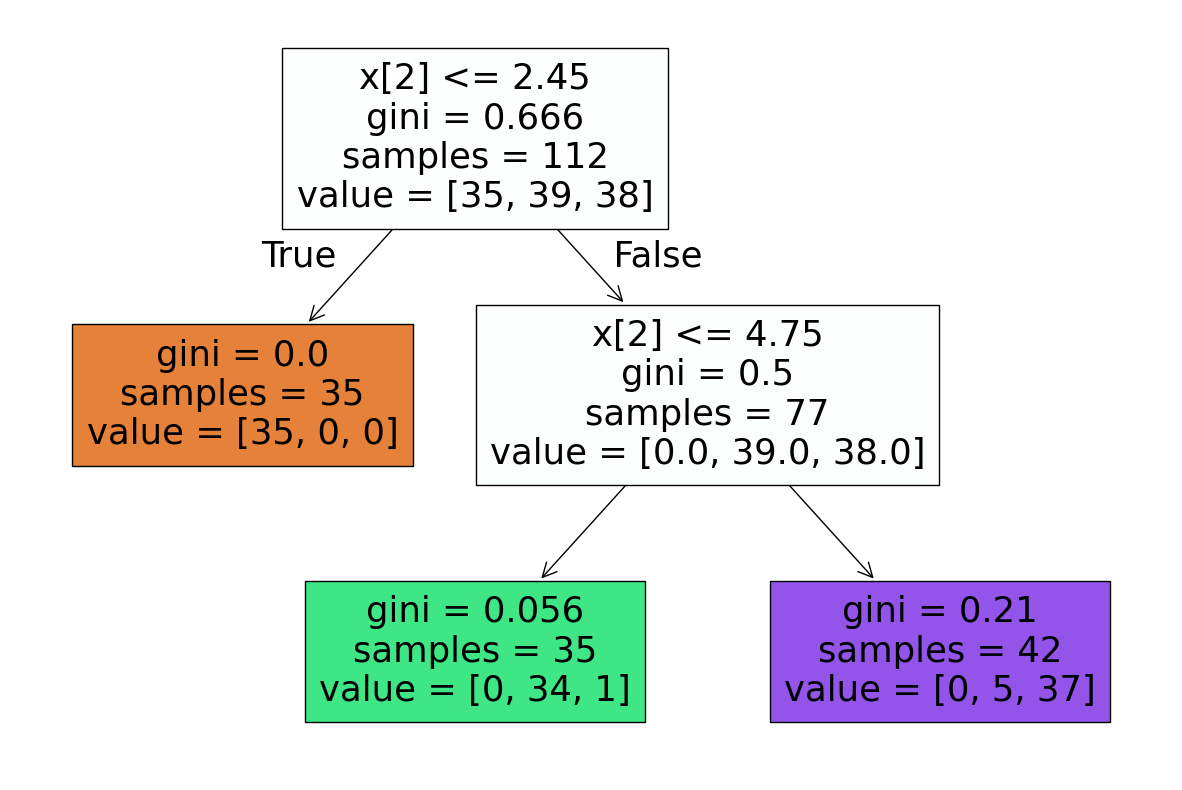

In [32]:
## visualize decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)
plt.show()

In [33]:
y_pred = treeclassifier.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print("Accuracy: ",accuracy_score(y_pred,y_test))
print("confuion matrix: ",confusion_matrix(y_pred,y_test))
print("classification_report: ",classification_report(y_pred,y_test))

Accuracy:  0.9736842105263158
confuion matrix:  [[15  0  0]
 [ 0 10  0]
 [ 0  1 12]]
classification_report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.91      1.00      0.95        10
           2       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

